In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
%matplotlib inline


dpi=300

# 1. Загрузить файл hr.csv.

In [2]:
%%time

# 1.Загрузить файл hr.csv.

url = 'hr.csv'
df=pd.read_csv(url)

df.head()

Wall time: 27 ms


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).


In [3]:
# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


  ## 2.1 Мода


In [4]:
mode = df.mode()
mode[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


# 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [5]:
# Рассчет
matrix_correlation = df.corr()
matrix_correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


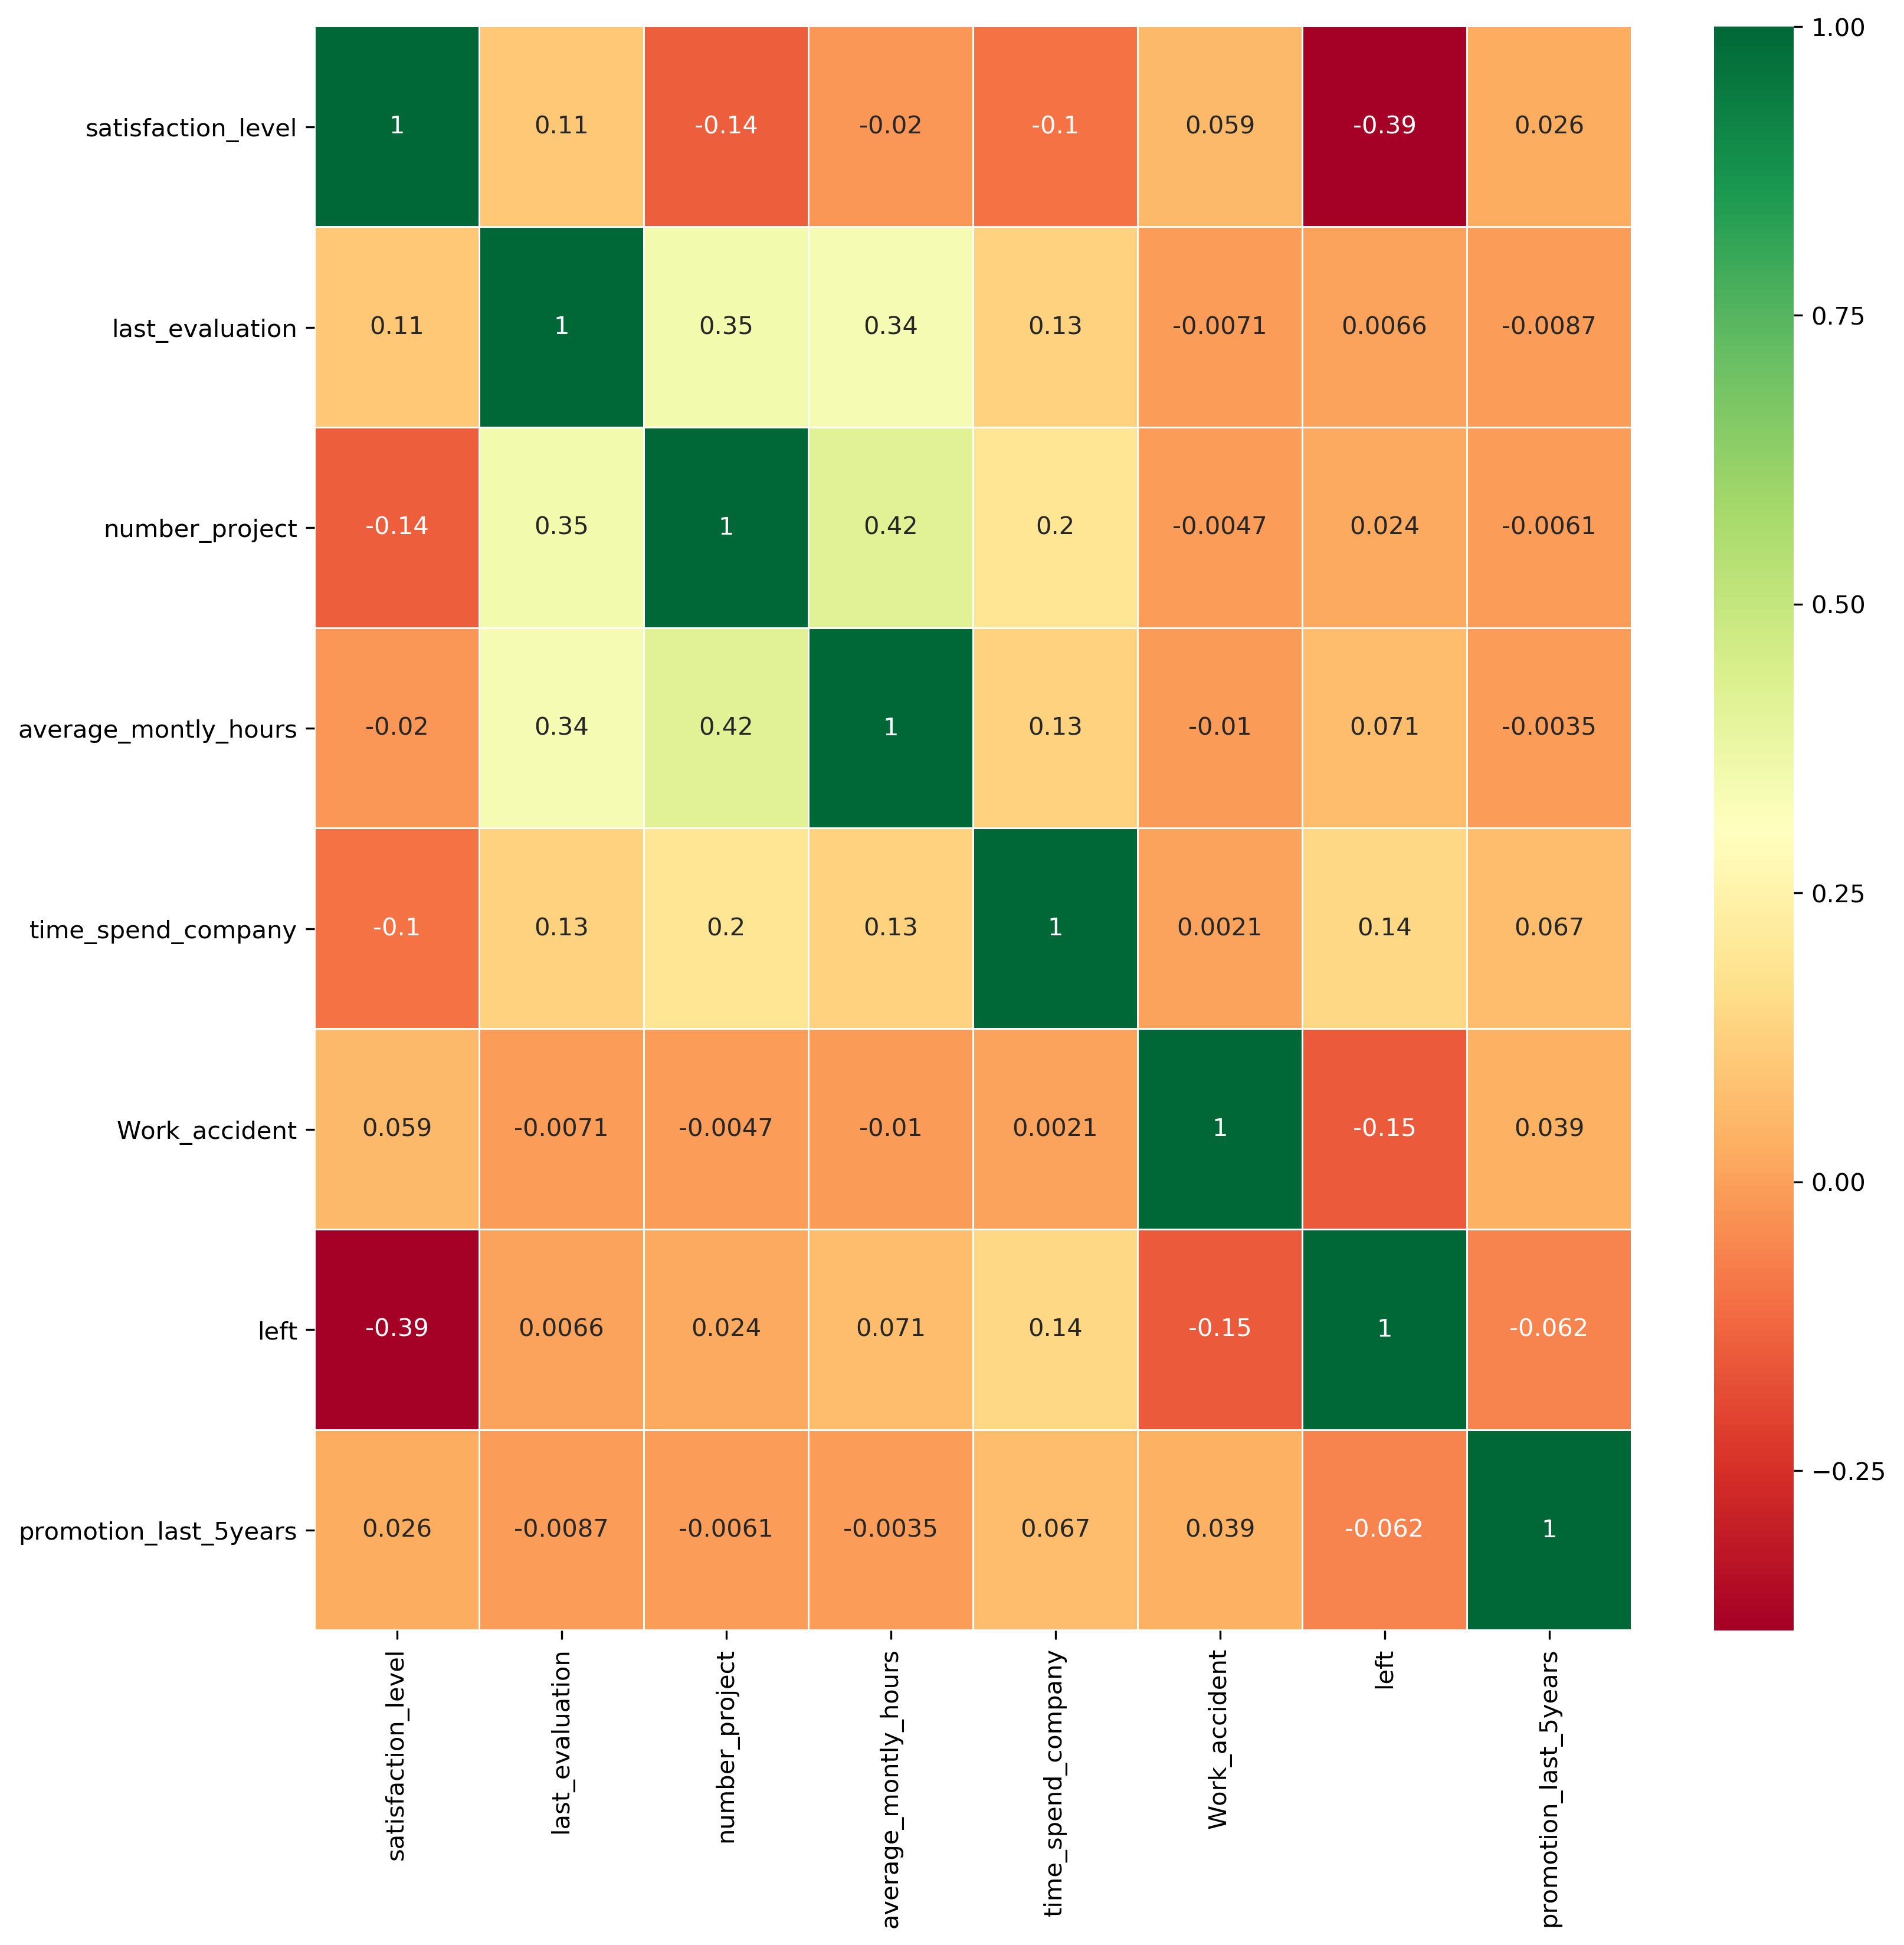

In [6]:
# Визуализация
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,12), dpi=dpi)
sns.heatmap(matrix_correlation, annot=True, cmap='RdYlGn', linewidths=.5)
 

# 4. Визуализировать несколько взаимосвязей между переменными.


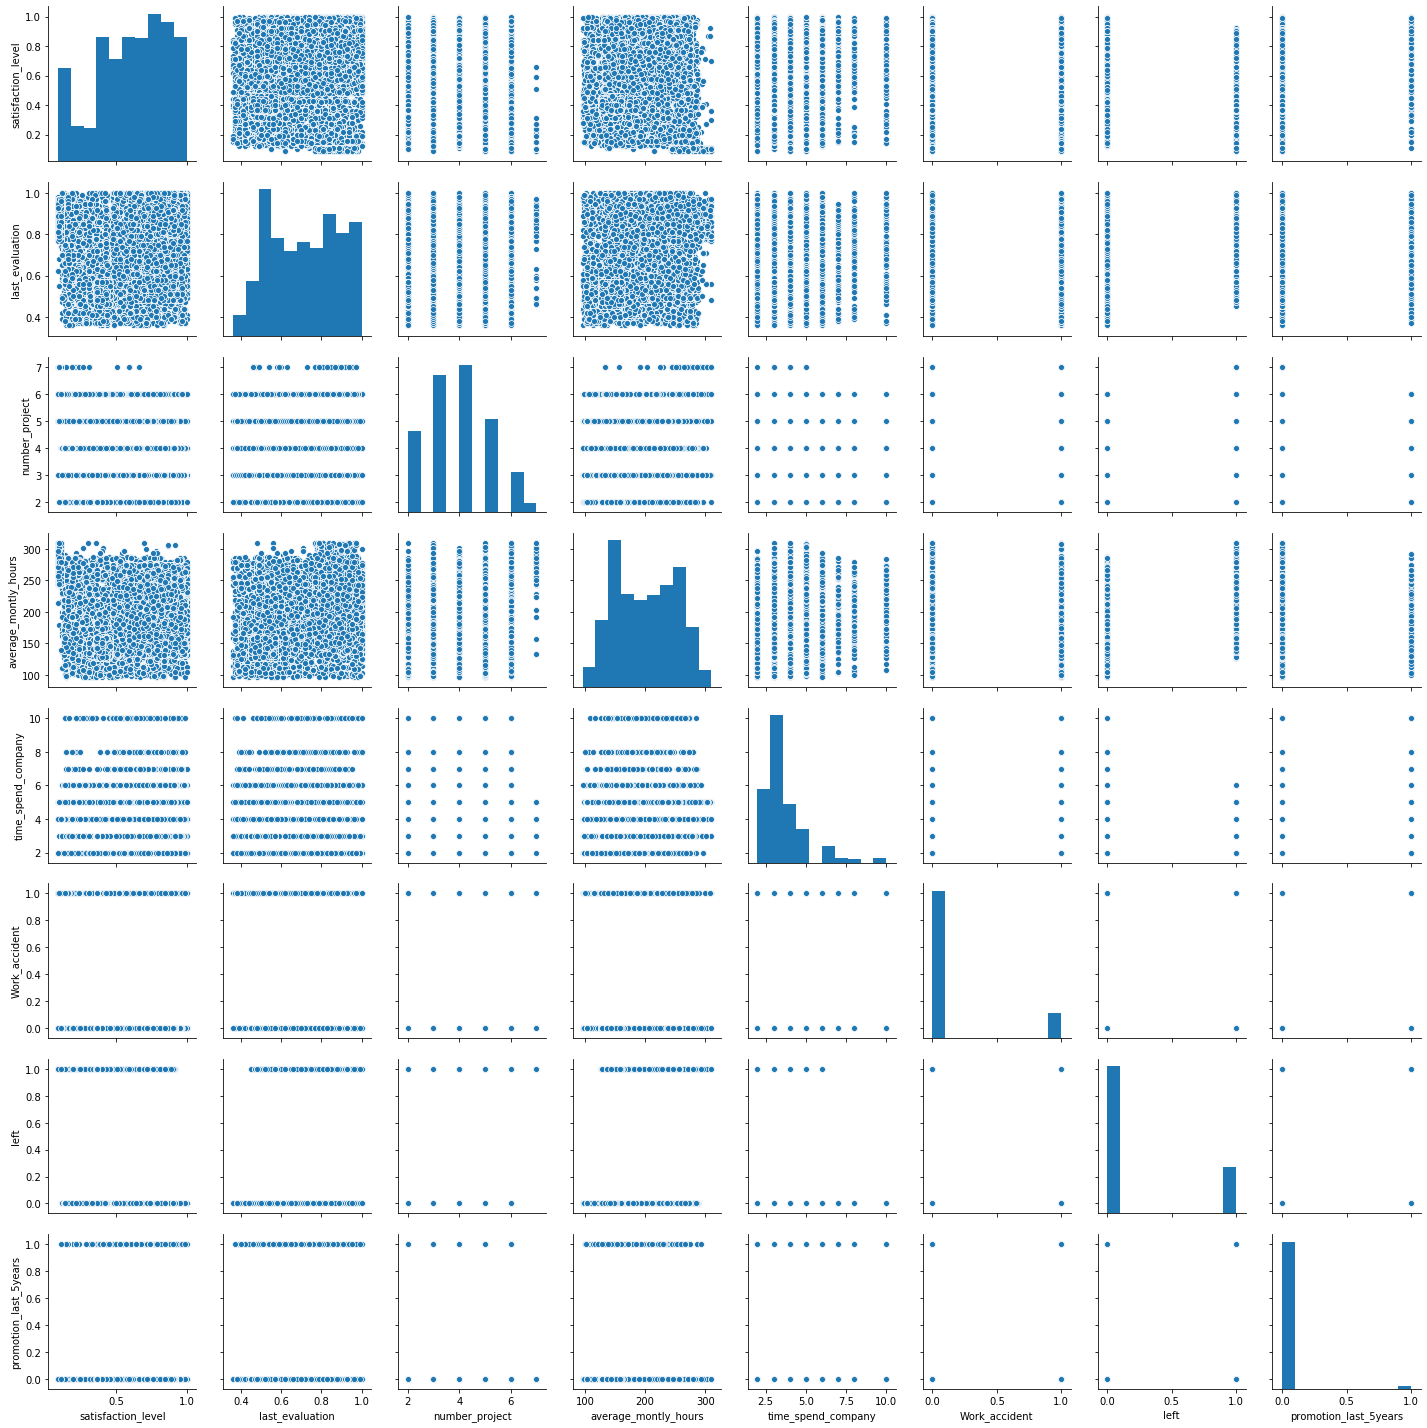

In [7]:
# Визуализация
sns.pairplot(df)

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.


### Гипотеза 1: Уволенных продажников с высоким уровнем удовлетворенности не отличаются от коллег, у которых уровень удовлетворенности < 0.5

In [8]:
# Если p-value >= 5%, то гипотезу принимаем
# Если p-value < 5%, то гипотезу отвергаем
'''
вы тестируете две гипотезы различий в данном случае, 
H0: разницы между группами нет, 
H1: разница между группами есть. Для этого используете t-критерий Стьюдента 
(при чем только в том случае, если тестируемый данные подчиняются закону нормального распределения, 
иначе используете Манна-Уитни).

по идее да, но проблема в том, что достоверно не проверите. 
Дело в том, что анализ гистограммы для ответа на вопрос о нормальности распеределения не самый достоверный. 
Надо использовать критерии типа Колмогорова-Смирнова, а лучше всего Шапиро-Уилка. 
Но этого на курсе не изучали, поэтому придётся смотреть гистограммы, за неимением лучшего
'''

happy = df.loc[ (df['satisfaction_level'] > 0.5) & (df['sales'] == 'sales') ]['left']
not_happy = df.loc[ (df['satisfaction_level'] < 0.5) & (df['sales'] == 'sales') ]['left']

tt = stats.mannwhitneyu(happy, not_happy)

print(tt)
print(f'\033[1mВЫВОД: Т.к. p-value({tt[1]})<5%, то мы отвергаем гипотезу и говорим, что разница между группами есть.')

MannwhitneyuResult(statistic=956774.0, pvalue=1.77486054229687e-223)
ВЫВОД: Т.к. p-value(1.77486054229687e-223)<5%, то мы отвергаем гипотезу и говорим, что разница между группами есть.


### Гипотеза 2: Уволенные сотрудники технического департамента такие же, как и ныне работающие (по уровню удовлетворенности)

In [9]:
# Если p-value >= 5%, то гипотезу принимаем
# Если p-value < 5%, то гипотезу отвергаем


left_tech = df.loc[ (df['left'] == 1) & (df['sales'] == 'technical') ]['satisfaction_level']
not_left_happy = df.loc[ (df['left'] == 0) & (df['sales'] == 'technical') ]['satisfaction_level']

tt_tech = stats.mannwhitneyu(left_tech, not_left_happy)

print(tt_tech)
print(f'\033[1mВЫВОД: Т.к. p-value({tt_tech[1]})<5%, то мы отвергаем гипотезу и говорим, что разница между группами есть.')

MannwhitneyuResult(statistic=355212.0, pvalue=1.5336760878371646e-85)
ВЫВОД: Т.к. p-value(1.5336760878371646e-85)<5%, то мы отвергаем гипотезу и говорим, что разница между группами есть.


 # 6. Рассчитать сколько работников работает в каждом департаменте.

In [10]:
# Т.к. условие "работает", следовательно, они "не уволились" ---> left != 1

# Оставляем всех, кто еще работает
work_now = df.loc[ df['left'] != 1 ]

# Группируем по отделам
work_now = work_now.groupby('sales').count().reset_index()[ ['sales', 'satisfaction_level'] ]

# Для удобства дальнейшего использования данных переименовывем столбцы
work_now.columns=['departament', 'count']

# Сортируем данные
work_now.sort_values(by='count', inplace=True)

for index, row in work_now.iterrows():
    print(f'В отделе `{row["departament"]}` работает {row["count"]} сотрудник(-ов).')


В отделе `hr` работает 524 сотрудник(-ов).
В отделе `management` работает 539 сотрудник(-ов).
В отделе `accounting` работает 563 сотрудник(-ов).
В отделе `marketing` работает 655 сотрудник(-ов).
В отделе `RandD` работает 666 сотрудник(-ов).
В отделе `product_mng` работает 704 сотрудник(-ов).
В отделе `IT` работает 954 сотрудник(-ов).
В отделе `support` работает 1674 сотрудник(-ов).
В отделе `technical` работает 2023 сотрудник(-ов).
В отделе `sales` работает 3126 сотрудник(-ов).


# 7. Показать распределение сотрудников по зарплатам.

In [11]:
salary = df.groupby('salary').count().reset_index()[ ['salary', 'satisfaction_level'] ]
salary.columns=['salary', 'count']
salary.sort_values(by = 'count', inplace=True)

<BarContainer object of 3 artists>

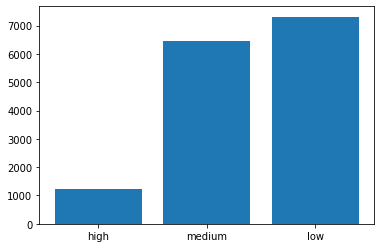

In [12]:
plt.bar(salary['salary'], salary['count'])

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [13]:
# Вариант 1

salary_dep = df.groupby(['sales', 'salary']).count()
salary_dep['satisfaction_level']

sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: satisfaction_level, dtype: int64

In [14]:
# Вариант 2

salary_dep = df.groupby(['sales', 'salary']).count()
salary_dep = salary_dep.reset_index()[['sales', 'salary', 'satisfaction_level']]
salary_dep

,sales,salary,satisfaction_level
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


# 9. Сколько сотрудников покинули компанию.

In [15]:
left = len(df.loc[ df['left']==1 ])
print(f'{left} сотрудник(-ов) покинули компанию')

3571 сотрудник(-ов) покинули компанию


# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.


## Вариант решения №1

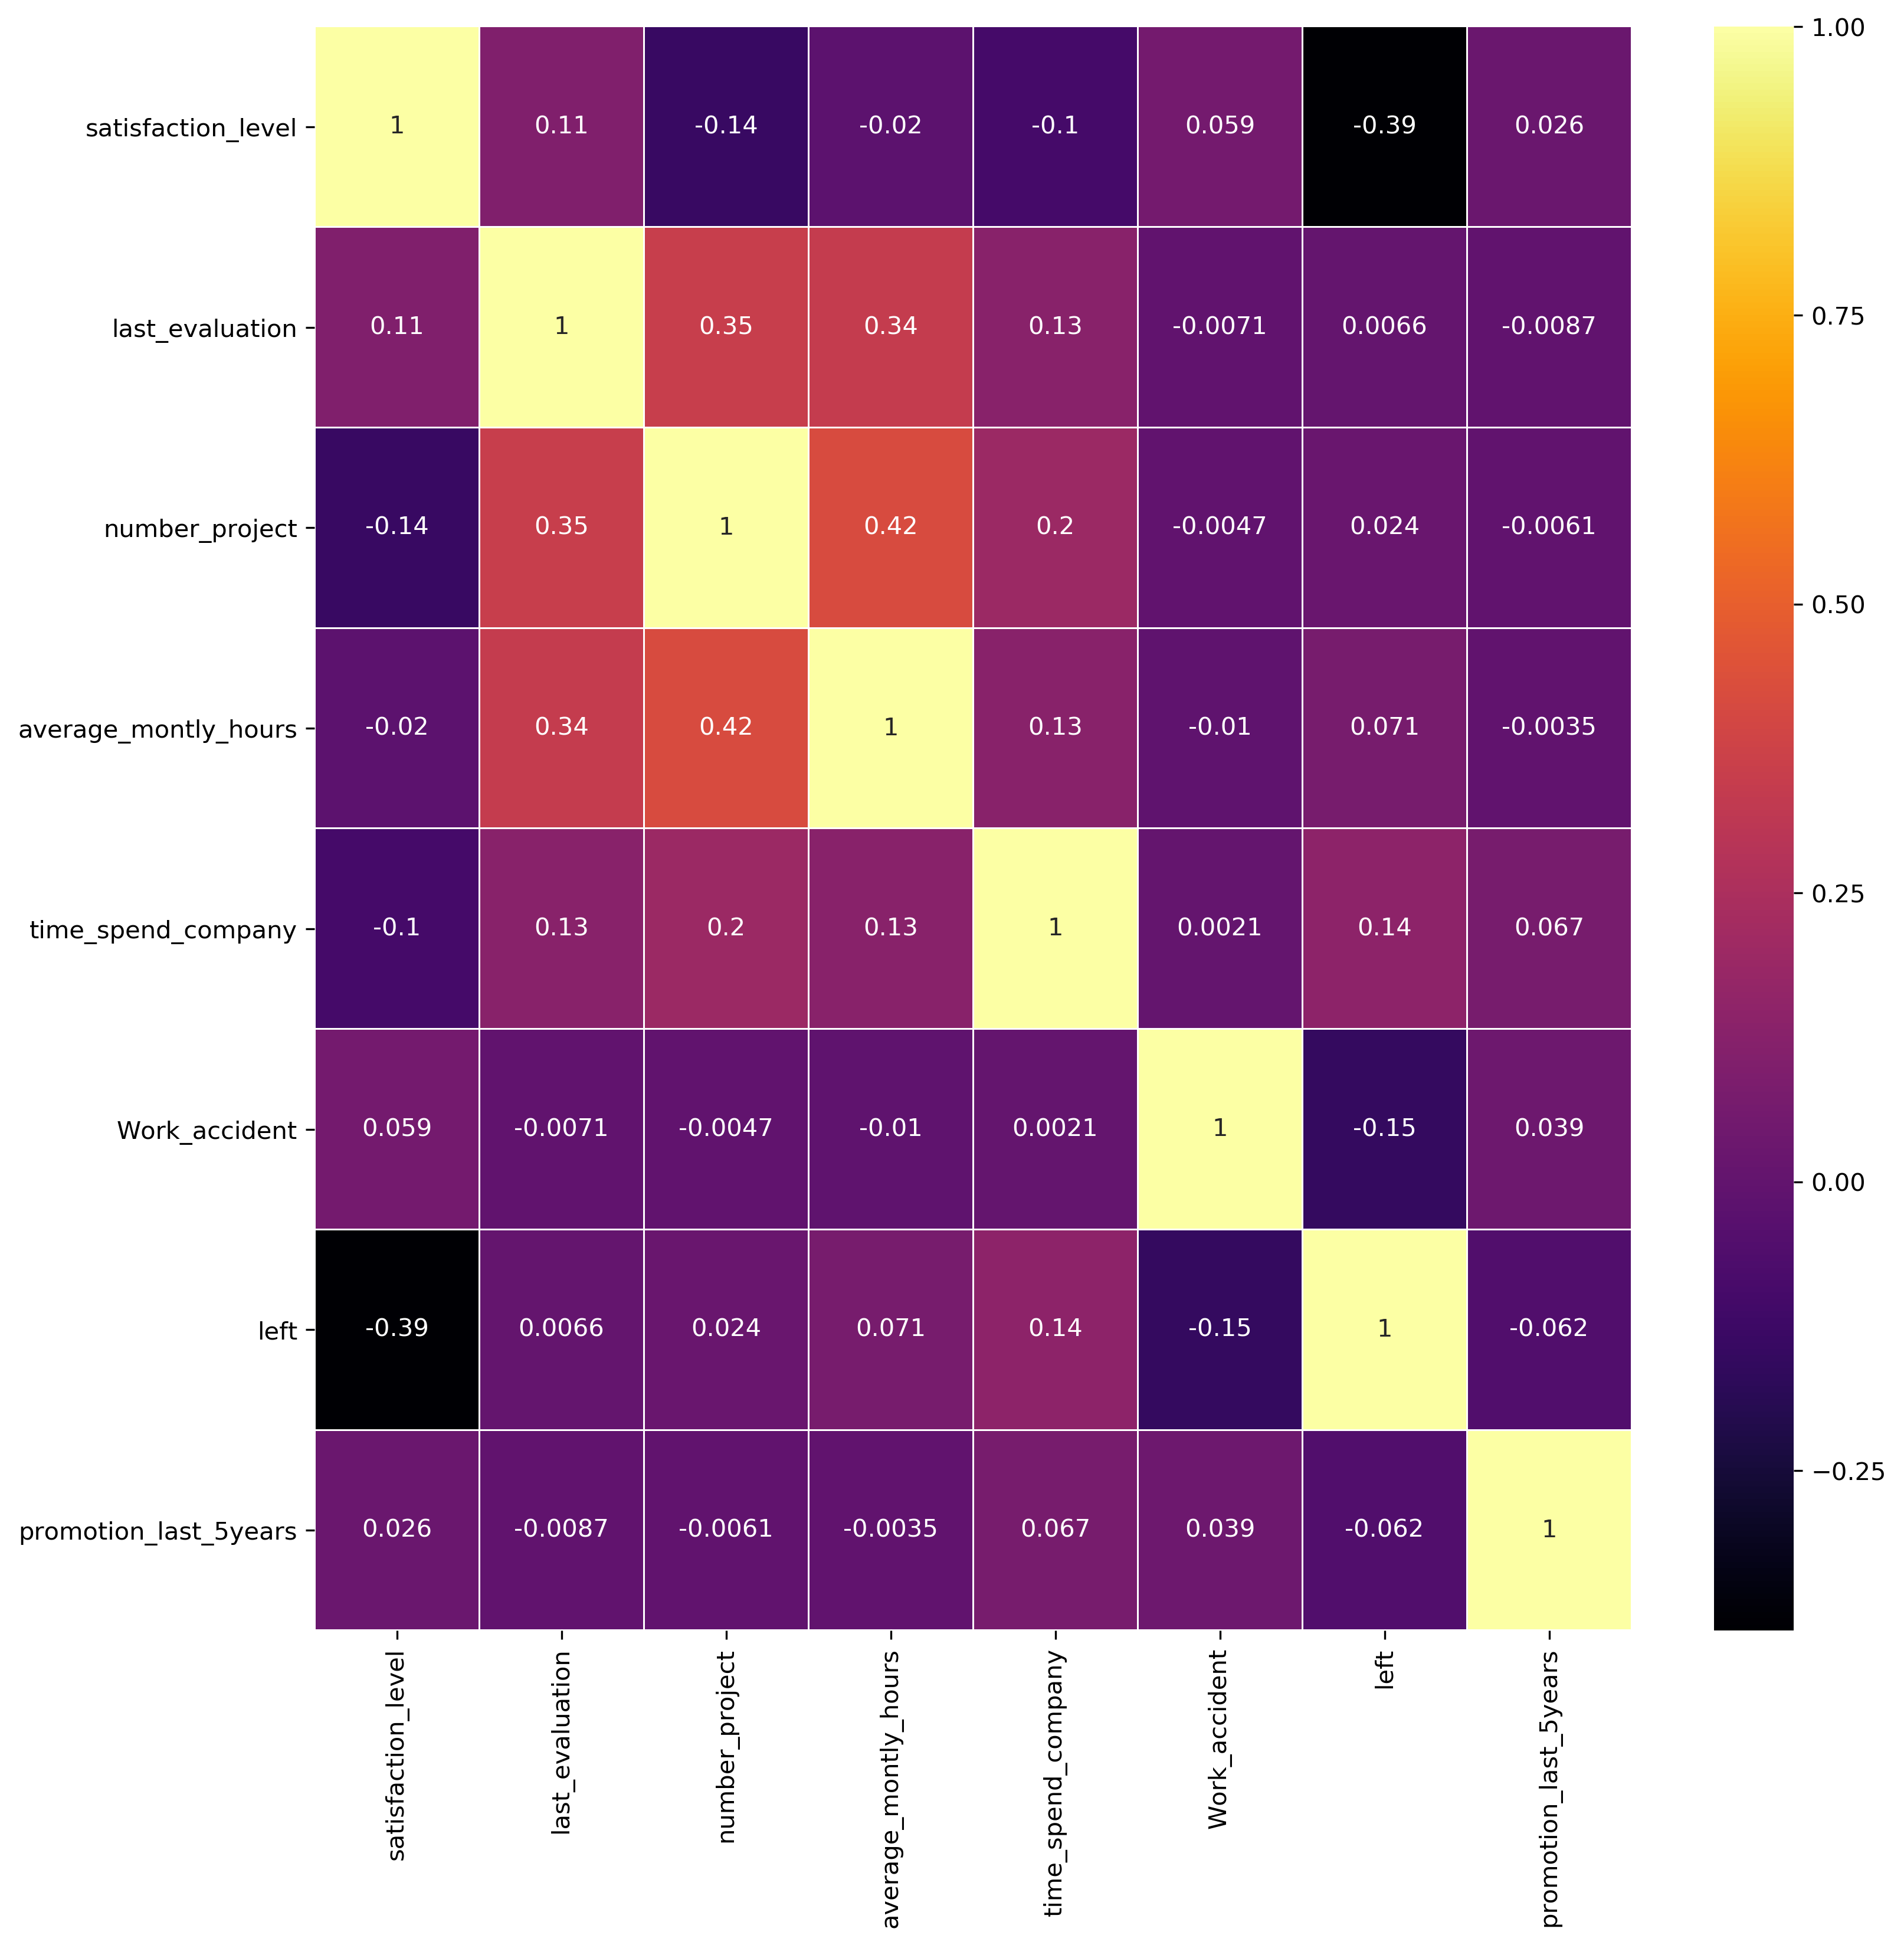

In [16]:
# Визуализация корреляции
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,12), dpi=dpi)
sns.heatmap(matrix_correlation, annot=True, cmap='inferno', linewidths=.5)

In [17]:
'''
Попробуем понять какие факторы являются главными при уходе из компании
'''
# Забираем из df 6 первых столбцов
input_x = df.iloc[:,:6]

# Целевое значение
Y = df['left']


from sklearn.model_selection import train_test_split

# Делим наши данные на тестовые и боевые
X_train_27, X_test_27, y_train_27, y_test_27 = train_test_split(input_x, Y, test_size=0.4)

No handles with labels found to put in legend.


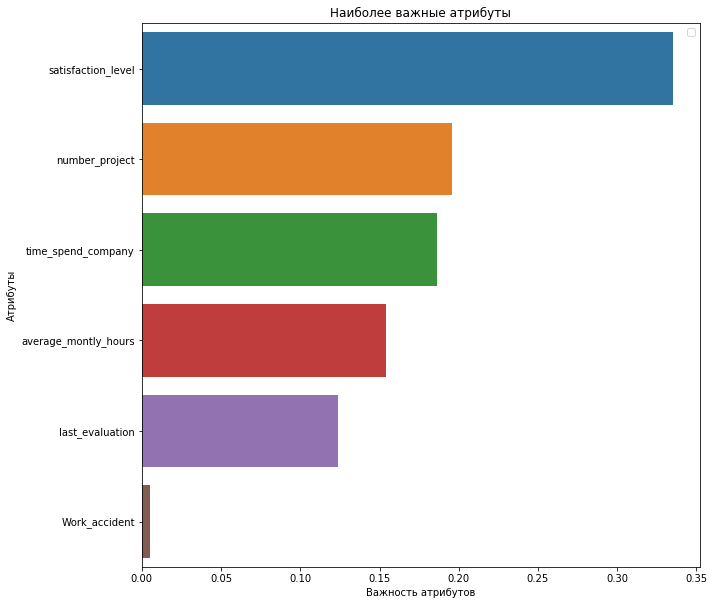


ВЫВОД: Основными факторами ухода сотрудников являются "satisfaction_level" и "number_project".


In [18]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_27,y_train_27)

# Сохраняем названия атрибутов
headers = list(X_train_27.columns.values)

# Сортируем полученные данные
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

# Строим столбчатую диаграмму для визуализации
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

print()
print(f'\033[1mВЫВОД: Основными факторами ухода сотрудников являются "{feature_imp.reset_index()["index"][0]}" и "{feature_imp.reset_index()["index"][1]}".')

## Вариант решения №2

Из жизни мы знаем, что **в разных отделах работают "разные" люди** (по складу ума, по характерам, по воспитанию и т.д.).
Следовательно, стоит рассматривать проблему _"ухода"_ человека не в рамках компании, а **в рамках отдела!**

Попробуем провести такой анализ.


In [19]:
# Создадим функцию, которая будет принимать Название отдела в качестве параметра и:
#     1. строить диаграмму важности факторов при увольнении (в рамках отдела)
#     2. Возвращать эти самые факторы в качестве результата

def experiments(departament=None):
    
    if departament == None:
        pass
      
    else:
        departament = str(departament)
        
        # Забираем из df 6 первых столбцов
        input_x = df.loc[ df['sales'] == departament]
        input_x = input_x.iloc[:,:6]
        # print(input_x)

        # Целевое значение
        Y = df.loc[ df['sales'] == departament]
        Y = Y['left']


        from sklearn.model_selection import train_test_split

        # Делим наши данные на тестовые и боевые
        X_train_27, X_test_27, y_train_27, y_test_27 = train_test_split(input_x, Y, test_size=0.4)

        from sklearn.ensemble import RandomForestClassifier

        # создаем модель деревья решений
        model=RandomForestClassifier(n_estimators=100)

        # обучаем модель
        model.fit(X_train_27,y_train_27)

        # Сохраняем названия атрибутов
        headers = list(X_train_27.columns.values)

        # Сортируем полученные данные
        feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

        # Строим столбчатую диаграмму для визуализации
        f, ax = plt.subplots(figsize=(10, 10))
        sns.barplot(x=feature_imp, y=feature_imp.index)

        plt.xlabel('Важность атрибутов')
        plt.ylabel('Атрибуты')
        plt.title(f"Наиболее важные атрибуты для отдела {departament.upper()}")
        plt.legend()
        
        print()
        print(f'Для отдела ***{departament.upper()}***')
        print(f'ВЫВОД: Основными факторами ухода сотрудников являются:\n - "{feature_imp.reset_index()["index"][0]}"\n - "{feature_imp.reset_index()["index"][1]}"\n - "{feature_imp.reset_index()["index"][2]}"')
              
              
        plt.show()

        print('\n\n\n\n')
              
        return feature_imp


No handles with labels found to put in legend.



Для отдела ***IT***
ВЫВОД: Основными факторами ухода сотрудников являются:
 - "satisfaction_level"
 - "number_project"
 - "average_montly_hours"


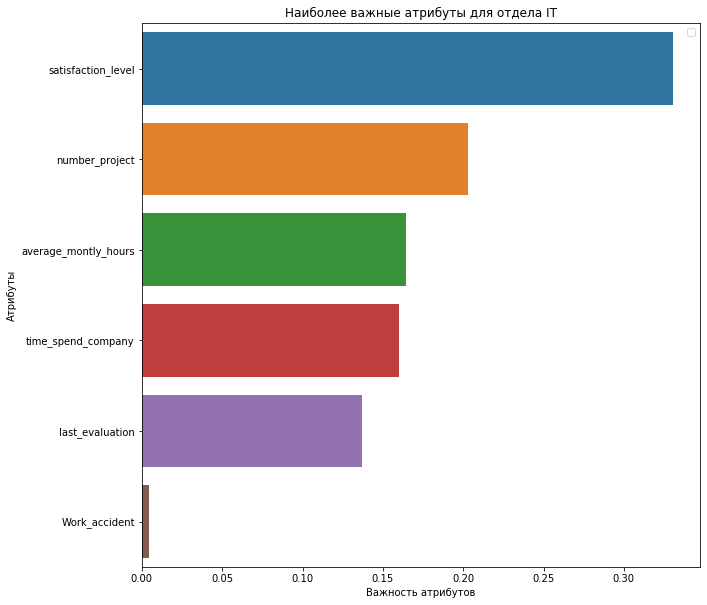

No handles with labels found to put in legend.



Для отдела ***RANDD***
ВЫВОД: Основными факторами ухода сотрудников являются:
 - "satisfaction_level"
 - "number_project"
 - "last_evaluation"


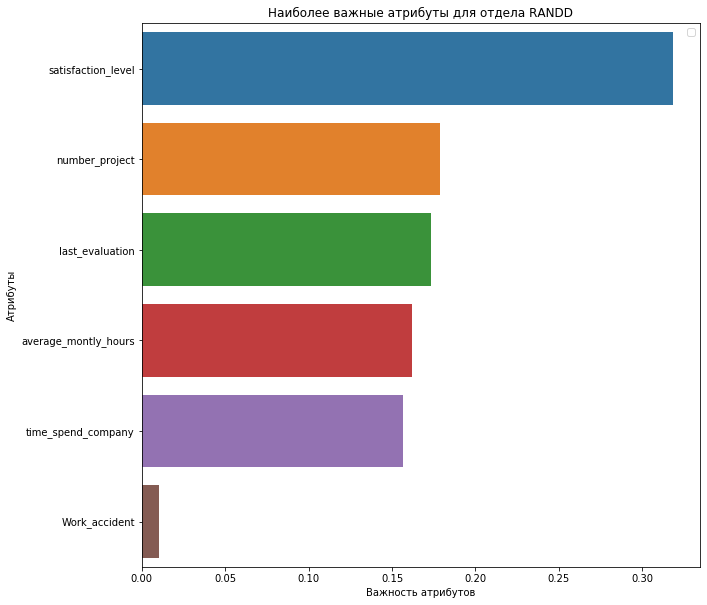

No handles with labels found to put in legend.



Для отдела ***ACCOUNTING***
ВЫВОД: Основными факторами ухода сотрудников являются:
 - "satisfaction_level"
 - "number_project"
 - "time_spend_company"


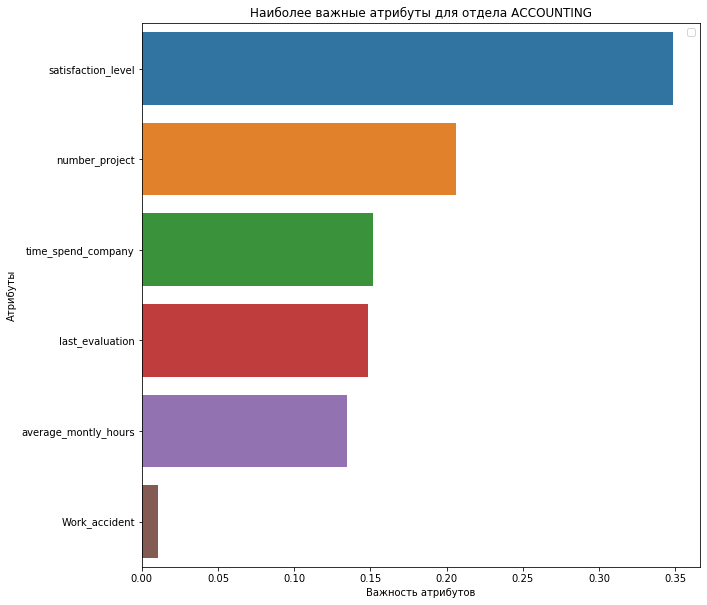

No handles with labels found to put in legend.



Для отдела ***HR***
ВЫВОД: Основными факторами ухода сотрудников являются:
 - "satisfaction_level"
 - "number_project"
 - "time_spend_company"


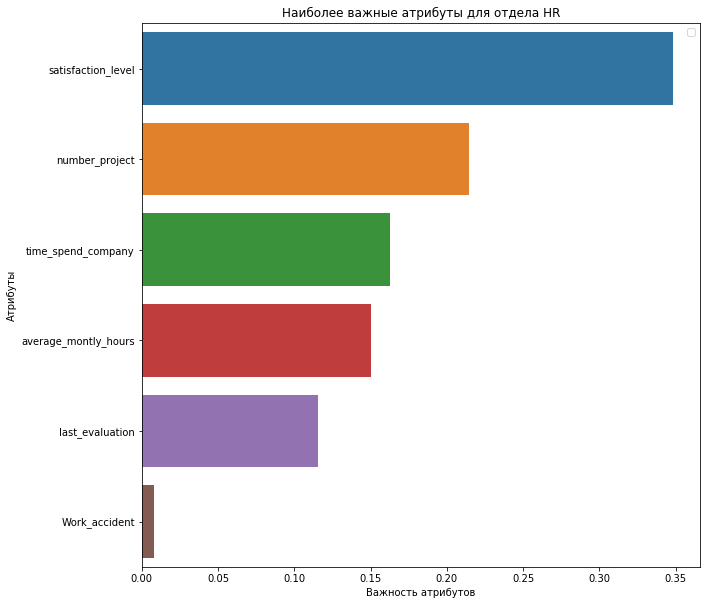

No handles with labels found to put in legend.



Для отдела ***MANAGEMENT***
ВЫВОД: Основными факторами ухода сотрудников являются:
 - "satisfaction_level"
 - "number_project"
 - "last_evaluation"


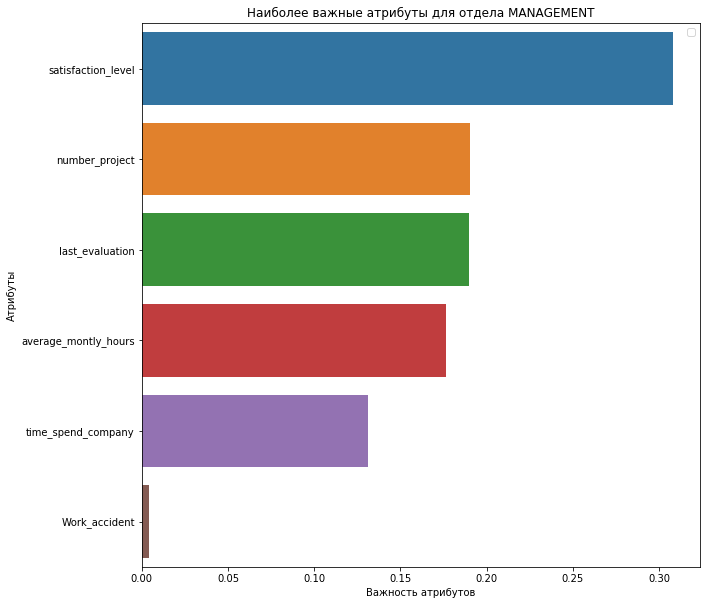

No handles with labels found to put in legend.



Для отдела ***MARKETING***
ВЫВОД: Основными факторами ухода сотрудников являются:
 - "satisfaction_level"
 - "number_project"
 - "time_spend_company"


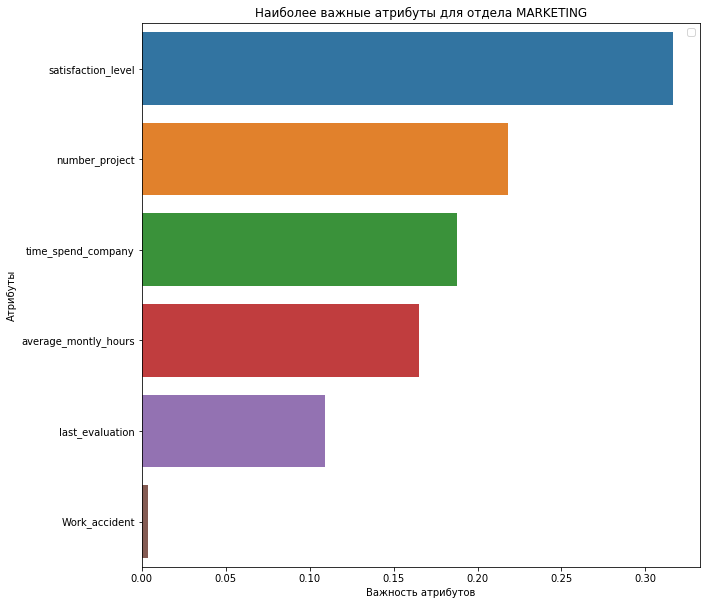

No handles with labels found to put in legend.



Для отдела ***PRODUCT_MNG***
ВЫВОД: Основными факторами ухода сотрудников являются:
 - "satisfaction_level"
 - "time_spend_company"
 - "number_project"


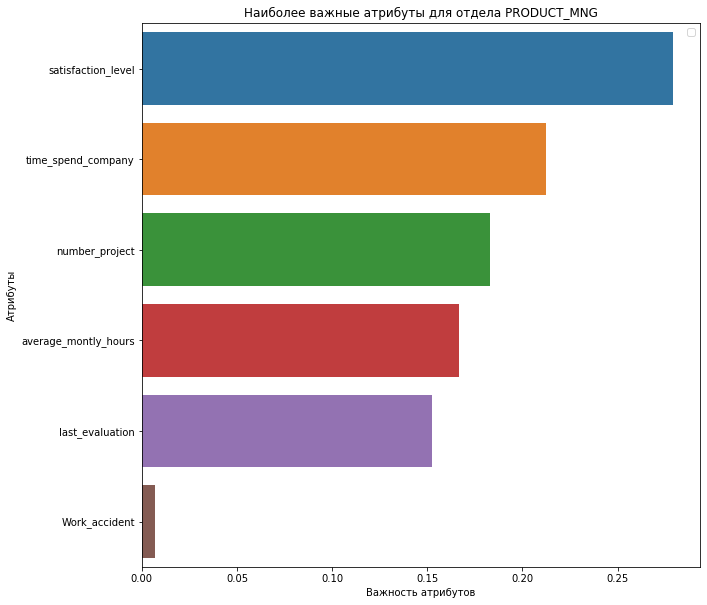

No handles with labels found to put in legend.



Для отдела ***SALES***
ВЫВОД: Основными факторами ухода сотрудников являются:
 - "satisfaction_level"
 - "number_project"
 - "time_spend_company"


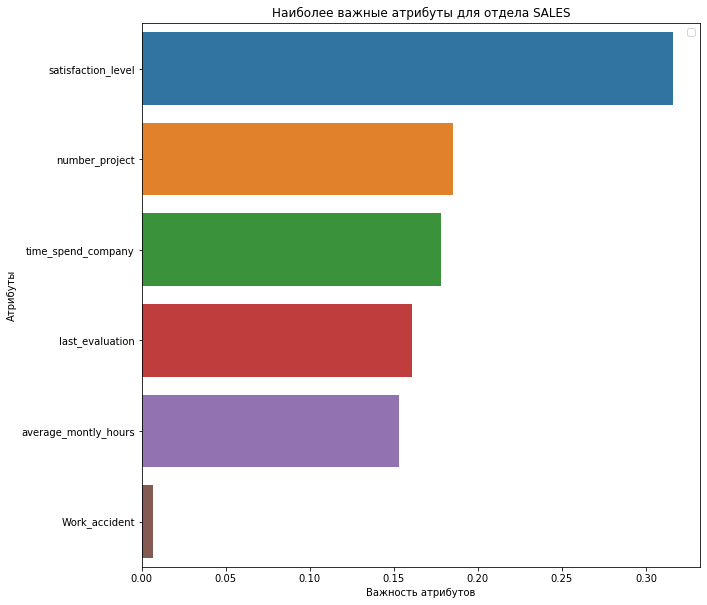

No handles with labels found to put in legend.



Для отдела ***SUPPORT***
ВЫВОД: Основными факторами ухода сотрудников являются:
 - "satisfaction_level"
 - "number_project"
 - "time_spend_company"


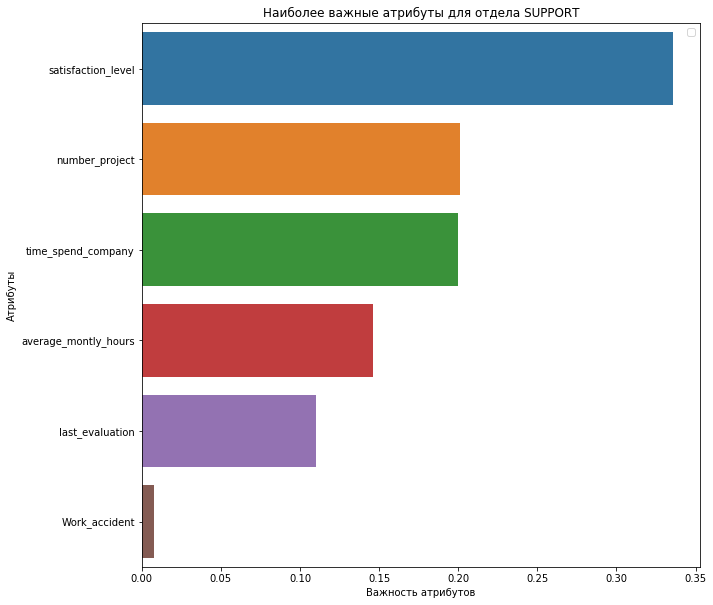

No handles with labels found to put in legend.








Для отдела ***TECHNICAL***
ВЫВОД: Основными факторами ухода сотрудников являются:
 - "satisfaction_level"
 - "number_project"
 - "average_montly_hours"


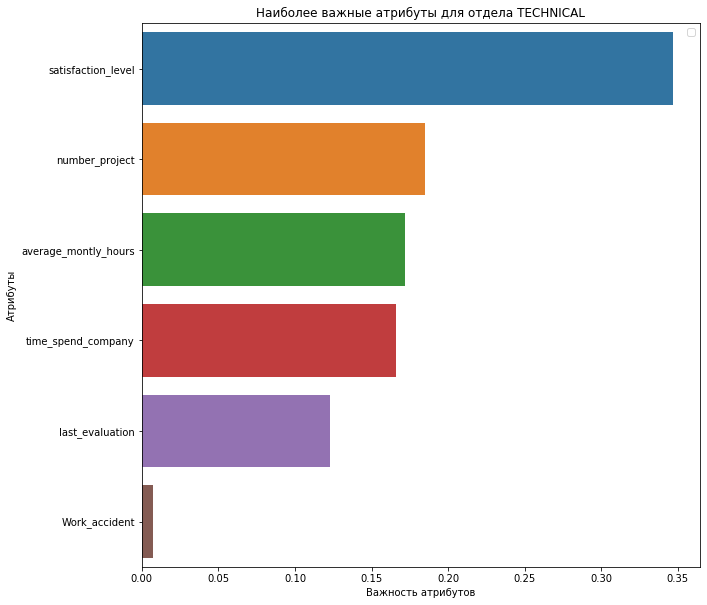

In [20]:
# Получаем список отделов
dep = df.groupby('sales').count().reset_index()['sales']

# Переменная для объединения результатов по всем отделам
res = {}

# Бежим в цикле по списку отделов
for x in dep:
    res.update({x:experiments(x)})
    


In [21]:
# Для контроля
res

{'IT': satisfaction_level      0.330735
 number_project          0.203249
 average_montly_hours    0.164618
 time_spend_company      0.160081
 last_evaluation         0.136865
 Work_accident           0.004453
 dtype: float64, 'RandD': satisfaction_level      0.318622
 number_project          0.178963
 last_evaluation         0.173467
 average_montly_hours    0.162170
 time_spend_company      0.156436
 Work_accident           0.010342
 dtype: float64, 'accounting': satisfaction_level      0.348612
 number_project          0.206266
 time_spend_company      0.151440
 last_evaluation         0.148453
 average_montly_hours    0.134835
 Work_accident           0.010393
 dtype: float64, 'hr': satisfaction_level      0.348479
 number_project          0.214657
 time_spend_company      0.162628
 average_montly_hours    0.150405
 last_evaluation         0.115641
 Work_accident           0.008191
 dtype: float64, 'management': satisfaction_level      0.308232
 number_project          0.190183
 la

In [22]:
# Создаем из наших данных новых df
parameters_df = pd.DataFrame(res).T

# Для контроля
parameters_df

,Work_accident,average_montly_hours,last_evaluation,number_project,satisfaction_level,time_spend_company
IT,0.004453,0.164618,0.136865,0.203249,0.330735,0.160081
RandD,0.010342,0.162170,0.173467,0.178963,0.318622,0.156436
accounting,0.010393,0.134835,0.148453,0.206266,0.348612,0.151440
hr,0.008191,0.150405,0.115641,0.214657,0.348479,0.162628
management,0.004225,0.176650,0.189595,0.190183,0.308232,0.131116
marketing,0.003426,0.165252,0.108918,0.218162,0.316585,0.187657
product_mng,0.006714,0.166755,0.152300,0.182671,0.279216,0.212344
sales,0.006403,0.153185,0.160871,0.185384,0.316229,0.177929
support,0.007639,0.145909,0.109981,0.201019,0.335905,0.199547
technical,0.007020,0.172111,0.122733,0.185226,0.347071,0.165840


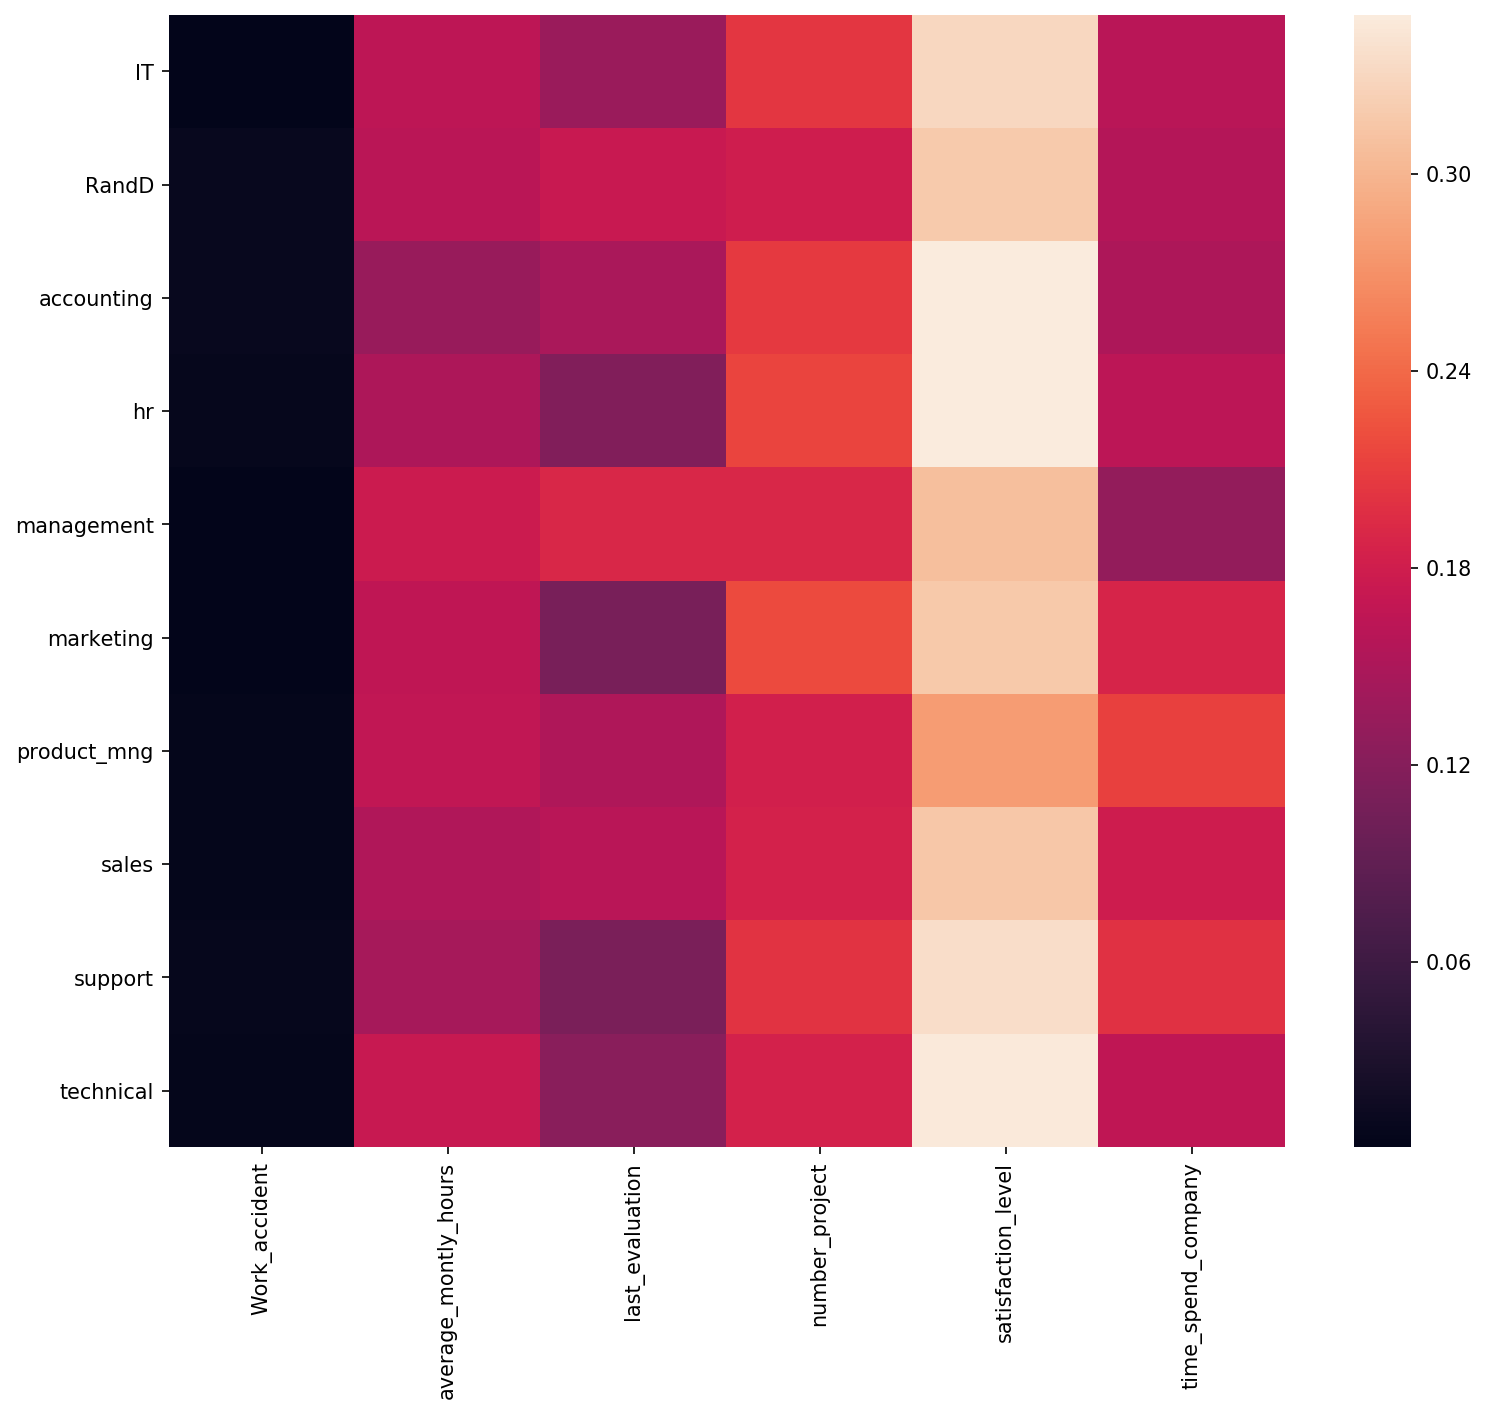

In [23]:
# И давайте визуально оценим какие же факторы важны при увольнении сотрудника (доводят его до увольнения)
# Изменяем размеры диаграммы
f, ax = plt.subplots(figsize=(12, 10), dpi=150)

# Рисуем тепловую карту
sns.heatmap(parameters_df)

In [24]:
"""
Вместо выводов:
    1. Мы выяснили, что в каждом отделе хоть немного, но отличается ситуация
    2. Основным фактором при уходе сотрудника является "satisfaction_level" (уроень удовлетворенности) (особенно в отделе "managment")
"""

'\nВместо выводов:\n    1. Мы выяснили, что в каждом отделе хоть немного, но отличается ситуация\n    2. Основным фактором при уходе сотрудника является "satisfaction_level" (уроень удовлетворенности) (особенно в отделе "managment")\n'